# <img style='float: left' width="150px" src="http://1.bp.blogspot.com/-gANdrsx2ceo/VkAzFQYZ8HI/AAAAAAAARXo/r25jef0dij4/s1600/2FNLTensorFlow.png"> <br> <br> <br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <br><br><br><font color='#EB8B34'>Tensorflow Example #2: Multi-Feature Linear Regression</font>

## Overview
In this notebook we go through a problem that will be modeled with _regression_. In regression, we predict continuous values of y based on the data. This time, however, we use multiple features to predict the value of y (instead of just 1 feature).

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import load_boston

## Set up the data
Read in Boston housing data from the US Census. A description of the data set can be found [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names). The data is from the [UC Irvine Dataset project](https://archive.ics.uci.edu/ml/datasets/Housing).

In [2]:
def read_boston_data():
    boston = load_boston()
    features_raw = np.array(boston.data)
    n_samples = features_raw.shape[0]
    features = features_raw
    #features = np.reshape(np.array([f[0] for f in features_raw]), [n_samples, 1])
    labels_raw = np.array(boston.target)
    labels = np.reshape(labels_raw, [n_samples, 1])
    return features, labels

In [3]:
features, labels = read_boston_data()

`features` is a 506x13 matrix: 506 data samples with 13 features each.

`labels` is a 506x1 matrix: 506 data samples that correspond to one label (the  price).

In [4]:
print "features.shape = %s" % (features.shape,)
print "labels.shape = %s" % (labels.shape,)

features.shape = (506, 13)
labels.shape = (506, 1)


### Feature Normalization
We perform *feature normalization* with z-score scaling so that the features we observe are on the same scale. This is highly recommended for the gradient descent optimizer we will use. Watch more about it [here](https://www.coursera.org/learn/machine-learning/lecture/xx3Da/gradient-descent-in-practice-i-feature-scaling).

In [5]:
def feature_normalize(dataset):
    mu = np.mean(dataset,axis=0)
    sigma = np.std(dataset, axis=0)
    return (dataset - mu)/sigma

In [6]:
normalized_features = feature_normalize(features)

### Segment out training and test sets.

In [7]:
rnd_indices = np.random.rand(len(features)) < 0.80

train_x = normalized_features[rnd_indices]
train_y = labels[rnd_indices]
test_x = normalized_features[~rnd_indices]
test_y = labels[~rnd_indices]

In [8]:
n_dim = normalized_features.shape[1]
print "Number of features: %d" % (n_dim)

Number of features: 13


## Define the TensorFlow Graph

#### Placeholders

We first define a placeholder for the housing input. This placeholder lets us change the data that we pass in as input to the TensorFlow graph. The data type is `float32` and the shape is `[None, n_dim]`. `None` specifies that the tensor can hold an arbitrary number of data points.

In [9]:
X = tf.placeholder(tf.float32, [None, n_dim], name="X") # training input

We now define a placeholder for the true labels.

In [10]:
Y = tf.placeholder(tf.float32, [None, 1], name="Y") # training labels

#### Variables
Variables represent the things that TensorFlow changes in order to make the model perform better on the training data. The weights `W` and biases `b` are represented as variables.

In [11]:
W = tf.Variable(tf.zeros([n_dim, 1]), name="weight")
b = tf.Variable(tf.zeros([1]), name="bias")

#### The model
This represents the mathematical model we are building.

In [12]:
y_ = tf.add(tf.matmul(X, W), b)

We again use mean-squared error as our loss function.
<br>
<img width="300px" src="mse.png">

In [13]:
cost = tf.reduce_mean(tf.square(y_ - Y))

Keep a history of the cost function value.

In [14]:
cost_history = np.empty(shape=[1], dtype=float)

In [15]:
training_step = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

### Execute the Graph
We create a TensorFlow session to execute the computation graph.<br>
We need to initialize the variables `W` and `b` before optimizing them, we do so with `tf.global_variables_initializer()`

In [16]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

training_epochs = 1000
for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={X:train_x, Y:train_y})
    cost_history = np.append(cost_history,sess.run(cost, feed_dict={X: train_x,Y: train_y}))

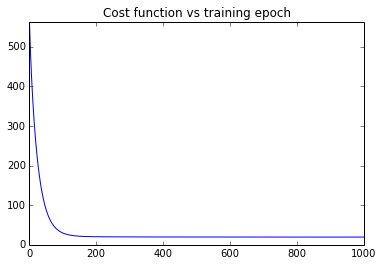

In [17]:
plt.plot(range(len(cost_history)), cost_history)
plt.title('Cost function vs training epoch')
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()

In [18]:
pred_y = sess.run(y_, feed_dict={X: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE: %.4f" % sess.run(mse)) 

MSE: 34.1683


/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


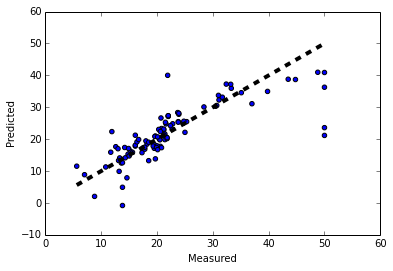

In [19]:
fig, ax = plt.subplots()
ax.scatter(test_y, pred_y)
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [20]:
# plt.scatter(train_x, train_y)
# plt.show()

In [21]:
sample_x = [[-0.41526932, -0.48772236, -0.59338101, -0.27259857, -0.74026221, 0.19427445, 0.36716642, 0.55715988, -0.8678825, -0.98732948, -0.30309415, 0.44105193, -0.49243937]]
pred = sess.run(y_, feed_dict={X: sample_x})
print pred[0][0]

24.7903
